In [1]:
# %%
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
# %%
path = './dataset/' 
train = pd.read_csv(path + 'sign_mnist_train.csv')
test =  pd.read_csv(path + 'sign_mnist_test.csv'
)

print(len(train))


27455


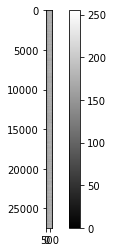

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         107     118     127     134     139     143     146     150     153   
1         155     157     156     156     156     157     156     158     158   
2         187     188     188     187     187     186     187     188     187   
3         211     211     212     212     211     210     211     210     210   
4         164     167     170     172     176     179     180     184     185   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27450     189     189     190     190     192     193     193     193     193   
27451     151     154     157     158     160     161     163     164     166   
27452     174     174     174     174     174     175     175     174     173   
27453     177     181     184     185     187     189     190     191     191   
27454     179     180     180     180     182     181     182     183     182   

       pixel10  ...  pixel7

In [5]:
# %%
plt.imshow(train.iloc[:, 1:], cmap='gray')
plt.colorbar()
plt.show() 
print(train.iloc[:, 1:])

# print(train.head())
# print('----------------------')
# print(test.head())
# print('----------------------')
# print(len(train), '  ', len(test))



In [6]:
# %% 
train_X = train.iloc[:, 1:].values
train_Y = train.iloc[:, 0].values
test_X = test.iloc[:, 1:].values
test_Y = test.iloc[:, 0].values

print('Before')
print(train_X.shape)
print(train_Y.shape)

train_X = train_X.reshape(-1, 28, 28) 
# test_Y = test_Y.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28)

print('After') 
print(train_X.shape)
print(test_X.shape)


Before
(27455, 784)
(27455,)
After
(27455, 28, 28)
(7172, 28, 28)


In [11]:
# %%
%matplotlib qt5
plt.imshow(train_X[0], cmap='gray')
plt.colorbar()
plt.show() 
print(train_Y[0])

3


In [12]:
# %%
train_X = train_X / 255.0 
test_X = test_X / 255.0 

print(train_X)
print(test_X)


[[[0.41960784 0.4627451  0.49803922 ... 0.66666667 0.66666667 0.6627451 ]
  [0.43529412 0.4745098  0.50588235 ... 0.67058824 0.67058824 0.66666667]
  [0.44313725 0.48235294 0.51372549 ... 0.67058824 0.67058824 0.67058824]
  ...
  [0.55686275 0.58823529 0.62352941 ... 0.79215686 0.78823529 0.78431373]
  [0.55686275 0.59215686 0.62745098 ... 0.8        0.79607843 0.79215686]
  [0.55686275 0.59215686 0.62745098 ... 0.8        0.79607843 0.79215686]]

 [[0.60784314 0.61568627 0.61176471 ... 0.54117647 0.36078431 0.42352941]
  [0.61960784 0.62352941 0.62352941 ... 0.55686275 0.45490196 0.56078431]
  [0.63137255 0.63137255 0.63137255 ... 0.57647059 0.49019608 0.54901961]
  ...
  [0.63529412 0.62352941 0.56862745 ... 0.35686275 0.39607843 0.36862745]
  [0.6        0.54509804 0.45098039 ... 0.38039216 0.37254902 0.47058824]
  [0.52941176 0.45490196 0.37254902 ... 0.40392157 0.52941176 0.58431373]]

 [[0.73333333 0.7372549  0.7372549  ... 0.25882353 0.30196078 0.3254902 ]
  [0.7372549  0.741176

In [ ]:
# %% 
# One-hot 
train_X = tf.keras.utils.to_categorical(train_Y, num_classes=26)
test_X = tf.keras.utils.to_categorical(test_Y, num_classes=26)


print(train_X)
print(test_X)



In [13]:
# %% 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), 
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 26)                3354      
Total params: 103,834
Trainable params: 103,834
Non-trainable params: 0
_________________________________________________________________


In [14]:
# %%
print(train_X.shape)
print(train_Y.shape)

history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)



(27455, 28, 28)
(27455,)


Epoch 1/25


  1/644 [..............................] - ETA: 0s - loss: 3.6087 - accuracy: 0.0312

 45/644 [=>............................] - ETA: 0s - loss: 3.2184 - accuracy: 0.0667

122/644 [====>.........................] - ETA: 0s - loss: 3.0499 - accuracy: 0.1127

200/644 [========>.....................] - ETA: 0s - loss: 2.8927 - accuracy: 0.1561



279/644 [===========>..................] - ETA: 0s - loss: 2.7492 - accuracy: 0.2031

355/644 [===============>..............] - ETA: 0s - loss: 2.6182 - accuracy: 0.2462

432/644 [===================>..........] - ETA: 0s - loss: 2.5143 - accuracy: 0.2776



512/644 [======================>.......] - ETA: 0s - loss: 2.4102 - accuracy: 0.3084



588/644 [==========================>...] - ETA: 0s - loss: 2.3221 - accuracy: 0.3320

644/644 [==============================] - 1s 1ms/step - loss: 2.2658 - accuracy: 0.3471 - val_loss: 1.5490 - val_accuracy: 0.5790


Epoch 2/25
  1/644 [..............................] - ETA: 0s - loss: 1.3386 - accuracy: 0.6562

 77/644 [==>...........................] - ETA: 0s - loss: 1.5859 - accuracy: 0.5312

155/644 [======>.......................] - ETA: 0s - loss: 1.5480 - accuracy: 0.5478

234/644 [=========>....................] - ETA: 0s - loss: 1.5125 - accuracy: 0.5576



312/644 [=============>................] - ETA: 0s - loss: 1.4782 - accuracy: 0.5694



388/644 [=================>............] - ETA: 0s - loss: 1.4451 - accuracy: 0.5793



466/644 [====================>.........] - ETA: 0s - loss: 1.4093 - accuracy: 0.5887



544/644 [========================>.....] - ETA: 0s - loss: 1.3874 - accuracy: 0.5959

621/644 [===========================>..] - ETA: 0s - loss: 1.3660 - accuracy: 0.6010



644/644 [==============================] - 1s 790us/step - loss: 1.3572 - accuracy: 0.6037 - val_loss: 1.1734 - val_accuracy: 0.6581


Epoch 3/25
  1/644 [..............................] - ETA: 0s - loss: 1.1199 - accuracy: 0.6562

 76/644 [==>...........................] - ETA: 0s - loss: 1.1625 - accuracy: 0.6649



154/644 [======>.......................] - ETA: 0s - loss: 1.1278 - accuracy: 0.6709

231/644 [=========>....................] - ETA: 0s - loss: 1.1188 - accuracy: 0.6694



310/644 [=============>................] - ETA: 0s - loss: 1.0945 - accuracy: 0.6774

387/644 [=================>............] - ETA: 0s - loss: 1.0807 - accuracy: 0.6818



463/644 [====================>.........] - ETA: 0s - loss: 1.0643 - accuracy: 0.6888



541/644 [========================>.....] - ETA: 0s - loss: 1.0530 - accuracy: 0.6915



619/644 [===========================>..] - ETA: 0s - loss: 1.0403 - accuracy: 0.6943

644/644 [==============================] - 1s 792us/step - loss: 1.0390 - accuracy: 0.6940 - val_loss: 0.9308 - val_accuracy: 0.7330


Epoch 4/25
  1/644 [..............................] - ETA: 0s - loss: 0.9670 - accuracy: 0.8438

 78/644 [==>...........................] - ETA: 0s - loss: 0.9194 - accuracy: 0.7304

156/644 [======>.......................] - ETA: 0s - loss: 0.9068 - accuracy: 0.7360

230/644 [=========>....................] - ETA: 0s - loss: 0.8930 - accuracy: 0.7393



306/644 [=============>................] - ETA: 0s - loss: 0.8875 - accuracy: 0.7437

383/644 [================>.............] - ETA: 0s - loss: 0.8778 - accuracy: 0.7455

461/644 [====================>.........] - ETA: 0s - loss: 0.8632 - accuracy: 0.7495



539/644 [========================>.....] - ETA: 0s - loss: 0.8563 - accuracy: 0.7509



616/644 [===========================>..] - ETA: 0s - loss: 0.8480 - accuracy: 0.7534

644/644 [==============================] - 1s 790us/step - loss: 0.8469 - accuracy: 0.7536 - val_loss: 0.7667 - val_accuracy: 0.7844


Epoch 5/25
  1/644 [..............................] - ETA: 0s - loss: 1.1315 - accuracy: 0.6562



 78/644 [==>...........................] - ETA: 0s - loss: 0.7920 - accuracy: 0.7652



153/644 [======>.......................] - ETA: 0s - loss: 0.7554 - accuracy: 0.7815

230/644 [=========>....................] - ETA: 0s - loss: 0.7506 - accuracy: 0.7853

309/644 [=============>................] - ETA: 0s - loss: 0.7448 - accuracy: 0.7831



387/644 [=================>............] - ETA: 0s - loss: 0.7376 - accuracy: 0.7850

465/644 [====================>.........] - ETA: 0s - loss: 0.7270 - accuracy: 0.7888



543/644 [========================>.....] - ETA: 0s - loss: 0.7188 - accuracy: 0.7919



618/644 [===========================>..] - ETA: 0s - loss: 0.7111 - accuracy: 0.7945



644/644 [==============================] - 1s 797us/step - loss: 0.7095 - accuracy: 0.7950 - val_loss: 0.6382 - val_accuracy: 0.8244


Epoch 6/25
  1/644 [..............................] - ETA: 0s - loss: 0.9205 - accuracy: 0.7500

 77/644 [==>...........................] - ETA: 0s - loss: 0.6784 - accuracy: 0.8036

154/644 [======>.......................] - ETA: 0s - loss: 0.6538 - accuracy: 0.8099

233/644 [=========>....................] - ETA: 0s - loss: 0.6420 - accuracy: 0.8152



311/644 [=============>................] - ETA: 0s - loss: 0.6290 - accuracy: 0.8189



388/644 [=================>............] - ETA: 0s - loss: 0.6202 - accuracy: 0.8226



463/644 [====================>.........] - ETA: 0s - loss: 0.6141 - accuracy: 0.8243

539/644 [========================>.....] - ETA: 0s - loss: 0.6113 - accuracy: 0.8251



614/644 [===========================>..] - ETA: 0s - loss: 0.6032 - accuracy: 0.8292

644/644 [==============================] - 1s 796us/step - loss: 0.5996 - accuracy: 0.8303 - val_loss: 0.6128 - val_accuracy: 0.8199


Epoch 7/25
  1/644 [..............................] - ETA: 0s - loss: 0.4378 - accuracy: 0.9062



 78/644 [==>...........................] - ETA: 0s - loss: 0.5596 - accuracy: 0.8478

153/644 [======>.......................] - ETA: 0s - loss: 0.5507 - accuracy: 0.8480

230/644 [=========>....................] - ETA: 0s - loss: 0.5472 - accuracy: 0.8495

309/644 [=============>................] - ETA: 0s - loss: 0.5429 - accuracy: 0.8491



384/644 [================>.............] - ETA: 0s - loss: 0.5368 - accuracy: 0.8493



461/644 [====================>.........] - ETA: 0s - loss: 0.5303 - accuracy: 0.8498

536/644 [=======================>......] - ETA: 0s - loss: 0.5236 - accuracy: 0.8524

613/644 [===========================>..] - ETA: 0s - loss: 0.5191 - accuracy: 0.8548

644/644 [==============================] - 1s 795us/step - loss: 0.5201 - accuracy: 0.8546 - val_loss: 0.5576 - val_accuracy: 0.8358


Epoch 8/25
  1/644 [..............................] - ETA: 0s - loss: 0.6874 - accuracy: 0.8125



 77/644 [==>...........................] - ETA: 0s - loss: 0.4975 - accuracy: 0.8604



154/644 [======>.......................] - ETA: 0s - loss: 0.4778 - accuracy: 0.8679

231/644 [=========>....................] - ETA: 0s - loss: 0.4764 - accuracy: 0.8680

306/644 [=============>................] - ETA: 0s - loss: 0.4674 - accuracy: 0.8707

385/644 [================>.............] - ETA: 0s - loss: 0.4610 - accuracy: 0.8731



463/644 [====================>.........] - ETA: 0s - loss: 0.4569 - accuracy: 0.8747



540/644 [========================>.....] - ETA: 0s - loss: 0.4509 - accuracy: 0.8762



617/644 [===========================>..] - ETA: 0s - loss: 0.4492 - accuracy: 0.8752



644/644 [==============================] - 1s 796us/step - loss: 0.4488 - accuracy: 0.8750 - val_loss: 0.4996 - val_accuracy: 0.8351


Epoch 9/25
  1/644 [..............................] - ETA: 0s - loss: 0.5075 - accuracy: 0.8750

 78/644 [==>...........................] - ETA: 0s - loss: 0.4149 - accuracy: 0.8842

154/644 [======>.......................] - ETA: 0s - loss: 0.4103 - accuracy: 0.8847

232/644 [=========>....................] - ETA: 0s - loss: 0.3996 - accuracy: 0.8901



311/644 [=============>................] - ETA: 0s - loss: 0.3996 - accuracy: 0.8903



387/644 [=================>............] - ETA: 0s - loss: 0.3967 - accuracy: 0.8918



462/644 [====================>.........] - ETA: 0s - loss: 0.3949 - accuracy: 0.8912

540/644 [========================>.....] - ETA: 0s - loss: 0.3975 - accuracy: 0.8905

614/644 [===========================>..] - ETA: 0s - loss: 0.3949 - accuracy: 0.8917

644/644 [==============================] - 1s 794us/step - loss: 0.3930 - accuracy: 0.8922 - val_loss: 0.3936 - val_accuracy: 0.8737


Epoch 10/25
  1/644 [..............................] - ETA: 0s - loss: 0.3578 - accuracy: 0.9062

 78/644 [==>...........................] - ETA: 0s - loss: 0.3570 - accuracy: 0.8990



155/644 [======>.......................] - ETA: 0s - loss: 0.3587 - accuracy: 0.9012

231/644 [=========>....................] - ETA: 0s - loss: 0.3533 - accuracy: 0.9045

310/644 [=============>................] - ETA: 0s - loss: 0.3496 - accuracy: 0.9054

389/644 [=================>............] - ETA: 0s - loss: 0.3478 - accuracy: 0.9072



467/644 [====================>.........] - ETA: 0s - loss: 0.3420 - accuracy: 0.9094



542/644 [========================>.....] - ETA: 0s - loss: 0.3372 - accuracy: 0.9108

618/644 [===========================>..] - ETA: 0s - loss: 0.3333 - accuracy: 0.9117



644/644 [==============================] - 1s 795us/step - loss: 0.3319 - accuracy: 0.9123 - val_loss: 0.3708 - val_accuracy: 0.8885


Epoch 11/25
  1/644 [..............................] - ETA: 0s - loss: 0.2802 - accuracy: 0.9375



 75/644 [==>...........................] - ETA: 0s - loss: 0.3184 - accuracy: 0.9158

153/644 [======>.......................] - ETA: 0s - loss: 0.3017 - accuracy: 0.9259

230/644 [=========>....................] - ETA: 0s - loss: 0.2976 - accuracy: 0.9246



306/644 [=============>................] - ETA: 0s - loss: 0.2902 - accuracy: 0.9277



383/644 [================>.............] - ETA: 0s - loss: 0.2886 - accuracy: 0.9278



459/644 [====================>.........] - ETA: 0s - loss: 0.2928 - accuracy: 0.9250



534/644 [=======================>......] - ETA: 0s - loss: 0.2914 - accuracy: 0.9256

611/644 [===========================>..] - ETA: 0s - loss: 0.2920 - accuracy: 0.9240

644/644 [==============================] - 1s 796us/step - loss: 0.2905 - accuracy: 0.9244 - val_loss: 0.2402 - val_accuracy: 0.9419


Epoch 12/25
  1/644 [..............................] - ETA: 0s - loss: 0.1420 - accuracy: 0.9688

 75/644 [==>...........................] - ETA: 0s - loss: 0.2472 - accuracy: 0.9400

152/644 [======>.......................] - ETA: 0s - loss: 0.2494 - accuracy: 0.9387

230/644 [=========>....................] - ETA: 0s - loss: 0.2558 - accuracy: 0.9355



308/644 [=============>................] - ETA: 0s - loss: 0.2563 - accuracy: 0.9339

384/644 [================>.............] - ETA: 0s - loss: 0.2524 - accuracy: 0.9337

460/644 [====================>.........] - ETA: 0s - loss: 0.2508 - accuracy: 0.9347



538/644 [========================>.....] - ETA: 0s - loss: 0.2489 - accuracy: 0.9359



615/644 [===========================>..] - ETA: 0s - loss: 0.2513 - accuracy: 0.9344

644/644 [==============================] - 1s 790us/step - loss: 0.2490 - accuracy: 0.9354 - val_loss: 0.2393 - val_accuracy: 0.9340


Epoch 13/25
  1/644 [..............................] - ETA: 0s - loss: 0.2079 - accuracy: 0.9375

 77/644 [==>...........................] - ETA: 0s - loss: 0.2310 - accuracy: 0.9391



154/644 [======>.......................] - ETA: 0s - loss: 0.2199 - accuracy: 0.9460

231/644 [=========>....................] - ETA: 0s - loss: 0.2203 - accuracy: 0.9479

309/644 [=============>................] - ETA: 0s - loss: 0.2223 - accuracy: 0.9468



386/644 [================>.............] - ETA: 0s - loss: 0.2166 - accuracy: 0.9489



464/644 [====================>.........] - ETA: 0s - loss: 0.2209 - accuracy: 0.9465

540/644 [========================>.....] - ETA: 0s - loss: 0.2187 - accuracy: 0.9475



617/644 [===========================>..] - ETA: 0s - loss: 0.2146 - accuracy: 0.9489



644/644 [==============================] - 1s 796us/step - loss: 0.2123 - accuracy: 0.9503 - val_loss: 0.1751 - val_accuracy: 0.9691


Epoch 14/25
  1/644 [..............................] - ETA: 0s - loss: 0.1422 - accuracy: 1.0000

 76/644 [==>...........................] - ETA: 0s - loss: 0.1797 - accuracy: 0.9609



154/644 [======>.......................] - ETA: 0s - loss: 0.1855 - accuracy: 0.9598

231/644 [=========>....................] - ETA: 0s - loss: 0.1990 - accuracy: 0.9540



309/644 [=============>................] - ETA: 0s - loss: 0.1956 - accuracy: 0.9559

385/644 [================>.............] - ETA: 0s - loss: 0.1920 - accuracy: 0.9569

462/644 [====================>.........] - ETA: 0s - loss: 0.1930 - accuracy: 0.9554



539/644 [========================>.....] - ETA: 0s - loss: 0.1937 - accuracy: 0.9548



615/644 [===========================>..] - ETA: 0s - loss: 0.1914 - accuracy: 0.9552

644/644 [==============================] - 1s 799us/step - loss: 0.1913 - accuracy: 0.9553 - val_loss: 0.2167 - val_accuracy: 0.9417


Epoch 15/25
  1/644 [..............................] - ETA: 0s - loss: 0.1186 - accuracy: 1.0000

 77/644 [==>...........................] - ETA: 0s - loss: 0.1645 - accuracy: 0.9659

153/644 [======>.......................] - ETA: 0s - loss: 0.1529 - accuracy: 0.9708

229/644 [=========>....................] - ETA: 0s - loss: 0.1528 - accuracy: 0.9701



307/644 [=============>................] - ETA: 0s - loss: 0.1551 - accuracy: 0.9685

383/644 [================>.............] - ETA: 0s - loss: 0.1557 - accuracy: 0.9677

460/644 [====================>.........] - ETA: 0s - loss: 0.1573 - accuracy: 0.9672



535/644 [=======================>......] - ETA: 0s - loss: 0.1580 - accuracy: 0.9669



612/644 [===========================>..] - ETA: 0s - loss: 0.1570 - accuracy: 0.9670

644/644 [==============================] - 1s 794us/step - loss: 0.1571 - accuracy: 0.9672 - val_loss: 0.1470 - val_accuracy: 0.9674


Epoch 16/25
  1/644 [..............................] - ETA: 0s - loss: 0.1481 - accuracy: 0.9375

 77/644 [==>...........................] - ETA: 0s - loss: 0.1755 - accuracy: 0.9554

153/644 [======>.......................] - ETA: 0s - loss: 0.1606 - accuracy: 0.9616

231/644 [=========>....................] - ETA: 0s - loss: 0.1585 - accuracy: 0.9629



307/644 [=============>................] - ETA: 0s - loss: 0.1503 - accuracy: 0.9676



384/644 [================>.............] - ETA: 0s - loss: 0.1488 - accuracy: 0.9674



460/644 [====================>.........] - ETA: 0s - loss: 0.1449 - accuracy: 0.9693

537/644 [========================>.....] - ETA: 0s - loss: 0.1440 - accuracy: 0.9694



614/644 [===========================>..] - ETA: 0s - loss: 0.1445 - accuracy: 0.9695

644/644 [==============================] - 1s 792us/step - loss: 0.1430 - accuracy: 0.9700 - val_loss: 0.1002 - val_accuracy: 0.9885


Epoch 17/25
  1/644 [..............................] - ETA: 0s - loss: 0.0777 - accuracy: 1.0000



 78/644 [==>...........................] - ETA: 0s - loss: 0.1183 - accuracy: 0.9788

154/644 [======>.......................] - ETA: 0s - loss: 0.1230 - accuracy: 0.9761

229/644 [=========>....................] - ETA: 0s - loss: 0.1163 - accuracy: 0.9790



304/644 [=============>................] - ETA: 0s - loss: 0.1162 - accuracy: 0.9797



381/644 [================>.............] - ETA: 0s - loss: 0.1151 - accuracy: 0.9803



457/644 [====================>.........] - ETA: 0s - loss: 0.1158 - accuracy: 0.9798

532/644 [=======================>......] - ETA: 0s - loss: 0.1165 - accuracy: 0.9794

608/644 [===========================>..] - ETA: 0s - loss: 0.1159 - accuracy: 0.9793

644/644 [==============================] - 1s 803us/step - loss: 0.1155 - accuracy: 0.9792 - val_loss: 0.0900 - val_accuracy: 0.9895


Epoch 18/25
  1/644 [..............................] - ETA: 0s - loss: 0.0415 - accuracy: 1.0000

 76/644 [==>...........................] - ETA: 0s - loss: 0.0867 - accuracy: 0.9893

152/644 [======>.......................] - ETA: 0s - loss: 0.1078 - accuracy: 0.9796

229/644 [=========>....................] - ETA: 0s - loss: 0.1202 - accuracy: 0.9745

305/644 [=============>................] - ETA: 0s - loss: 0.1192 - accuracy: 0.9743



380/644 [================>.............] - ETA: 0s - loss: 0.1184 - accuracy: 0.9746



457/644 [====================>.........] - ETA: 0s - loss: 0.1191 - accuracy: 0.9746



532/644 [=======================>......] - ETA: 0s - loss: 0.1149 - accuracy: 0.9763



607/644 [===========================>..] - ETA: 0s - loss: 0.1124 - accuracy: 0.9773

644/644 [==============================] - 1s 797us/step - loss: 0.1129 - accuracy: 0.9769 - val_loss: 0.0800 - val_accuracy: 0.9936


Epoch 19/25
  1/644 [..............................] - ETA: 0s - loss: 0.0760 - accuracy: 1.0000

 78/644 [==>...........................] - ETA: 0s - loss: 0.1111 - accuracy: 0.9776

153/644 [======>.......................] - ETA: 0s - loss: 0.0960 - accuracy: 0.9841

229/644 [=========>....................] - ETA: 0s - loss: 0.0952 - accuracy: 0.9842



307/644 [=============>................] - ETA: 0s - loss: 0.0922 - accuracy: 0.9848

383/644 [================>.............] - ETA: 0s - loss: 0.1006 - accuracy: 0.9805



459/644 [====================>.........] - ETA: 0s - loss: 0.0955 - accuracy: 0.9827



535/644 [=======================>......] - ETA: 0s - loss: 0.1006 - accuracy: 0.9801



612/644 [===========================>..] - ETA: 0s - loss: 0.0992 - accuracy: 0.9805

644/644 [==============================] - 1s 803us/step - loss: 0.0981 - accuracy: 0.9809 - val_loss: 0.0641 - val_accuracy: 0.9964


Epoch 20/25
  1/644 [..............................] - ETA: 0s - loss: 0.0243 - accuracy: 1.0000

 77/644 [==>...........................] - ETA: 0s - loss: 0.0720 - accuracy: 0.9915



154/644 [======>.......................] - ETA: 0s - loss: 0.0758 - accuracy: 0.9907

231/644 [=========>....................] - ETA: 0s - loss: 0.0769 - accuracy: 0.9899

308/644 [=============>................] - ETA: 0s - loss: 0.0772 - accuracy: 0.9885

385/644 [================>.............] - ETA: 0s - loss: 0.0748 - accuracy: 0.9896



463/644 [====================>.........] - ETA: 0s - loss: 0.0734 - accuracy: 0.9901



538/644 [========================>.....] - ETA: 0s - loss: 0.0724 - accuracy: 0.9902



613/644 [===========================>..] - ETA: 0s - loss: 0.0722 - accuracy: 0.9900



644/644 [==============================] - 1s 804us/step - loss: 0.0720 - accuracy: 0.9899 - val_loss: 0.0734 - val_accuracy: 0.9920


Epoch 21/25
  1/644 [..............................] - ETA: 0s - loss: 0.0851 - accuracy: 1.0000

 76/644 [==>...........................] - ETA: 0s - loss: 0.1038 - accuracy: 0.9757

152/644 [======>.......................] - ETA: 0s - loss: 0.0897 - accuracy: 0.9811

228/644 [=========>....................] - ETA: 0s - loss: 0.1058 - accuracy: 0.9738



304/644 [=============>................] - ETA: 0s - loss: 0.1028 - accuracy: 0.9758



378/644 [================>.............] - ETA: 0s - loss: 0.0954 - accuracy: 0.9788



453/644 [====================>.........] - ETA: 0s - loss: 0.0885 - accuracy: 0.9816

527/644 [=======================>......] - ETA: 0s - loss: 0.0824 - accuracy: 0.9841



602/644 [===========================>..] - ETA: 0s - loss: 0.0786 - accuracy: 0.9856

644/644 [==============================] - 1s 809us/step - loss: 0.0774 - accuracy: 0.9860 - val_loss: 0.1011 - val_accuracy: 0.9716


Epoch 22/25
  1/644 [..............................] - ETA: 0s - loss: 0.0821 - accuracy: 0.9688

 76/644 [==>...........................] - ETA: 0s - loss: 0.0581 - accuracy: 0.9910

153/644 [======>.......................] - ETA: 0s - loss: 0.0574 - accuracy: 0.9939

230/644 [=========>....................] - ETA: 0s - loss: 0.0569 - accuracy: 0.9939



306/644 [=============>................] - ETA: 0s - loss: 0.0582 - accuracy: 0.9925



380/644 [================>.............] - ETA: 0s - loss: 0.0604 - accuracy: 0.9917

456/644 [====================>.........] - ETA: 0s - loss: 0.0753 - accuracy: 0.9858



530/644 [=======================>......] - ETA: 0s - loss: 0.0732 - accuracy: 0.9866



606/644 [===========================>..] - ETA: 0s - loss: 0.0690 - accuracy: 0.9881

644/644 [==============================] - 1s 806us/step - loss: 0.0689 - accuracy: 0.9879 - val_loss: 0.0635 - val_accuracy: 0.9923


Epoch 23/25
  1/644 [..............................] - ETA: 0s - loss: 0.0349 - accuracy: 1.0000

 77/644 [==>...........................] - ETA: 0s - loss: 0.0787 - accuracy: 0.9842



155/644 [======>.......................] - ETA: 0s - loss: 0.0688 - accuracy: 0.9883

233/644 [=========>....................] - ETA: 0s - loss: 0.0606 - accuracy: 0.9906



310/644 [=============>................] - ETA: 0s - loss: 0.0552 - accuracy: 0.9924

387/644 [=================>............] - ETA: 0s - loss: 0.0532 - accuracy: 0.9926

463/644 [====================>.........] - ETA: 0s - loss: 0.0550 - accuracy: 0.9916



539/644 [========================>.....] - ETA: 0s - loss: 0.0548 - accuracy: 0.9914



615/644 [===========================>..] - ETA: 0s - loss: 0.0529 - accuracy: 0.9922

644/644 [==============================] - 1s 798us/step - loss: 0.0524 - accuracy: 0.9925 - val_loss: 0.0377 - val_accuracy: 0.9988


Epoch 24/25
  1/644 [..............................] - ETA: 0s - loss: 0.0361 - accuracy: 1.0000



 77/644 [==>...........................] - ETA: 0s - loss: 0.0583 - accuracy: 0.9882

154/644 [======>.......................] - ETA: 0s - loss: 0.0593 - accuracy: 0.9892

232/644 [=========>....................] - ETA: 0s - loss: 0.0584 - accuracy: 0.9906



308/644 [=============>................] - ETA: 0s - loss: 0.0618 - accuracy: 0.9893



386/644 [================>.............] - ETA: 0s - loss: 0.0662 - accuracy: 0.9872



462/644 [====================>.........] - ETA: 0s - loss: 0.0623 - accuracy: 0.9886

538/644 [========================>.....] - ETA: 0s - loss: 0.0581 - accuracy: 0.9901



615/644 [===========================>..] - ETA: 0s - loss: 0.0560 - accuracy: 0.9909

644/644 [==============================] - 1s 806us/step - loss: 0.0550 - accuracy: 0.9912 - val_loss: 0.0360 - val_accuracy: 0.9972


Epoch 25/25
  1/644 [..............................] - ETA: 0s - loss: 0.0403 - accuracy: 1.0000

 77/644 [==>...........................] - ETA: 0s - loss: 0.0389 - accuracy: 0.9951

154/644 [======>.......................] - ETA: 0s - loss: 0.0465 - accuracy: 0.9935

230/644 [=========>....................] - ETA: 0s - loss: 0.0479 - accuracy: 0.9925



309/644 [=============>................] - ETA: 0s - loss: 0.0459 - accuracy: 0.9929

386/644 [================>.............] - ETA: 0s - loss: 0.0487 - accuracy: 0.9919

461/644 [====================>.........] - ETA: 0s - loss: 0.0488 - accuracy: 0.9923

536/644 [=======================>......] - ETA: 0s - loss: 0.0474 - accuracy: 0.9926



614/644 [===========================>..] - ETA: 0s - loss: 0.0462 - accuracy: 0.9931

644/644 [==============================] - 1s 803us/step - loss: 0.0461 - accuracy: 0.9931 - val_loss: 0.0429 - val_accuracy: 0.9940


In [15]:
# %%
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib qt5

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')

plt.xlabel('Epoch')
plt.legend() 

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend() 

plt.show()



In [16]:
model.save('sign_language.h5')

In [18]:
# %% 
# ------------------------------------------------------------------
# CNN 처리
train_X = train.iloc[:, 1:].values
train_Y = train.iloc[:, 0].values

test_X = test.iloc[:, 1:].values
test_Y = test.iloc[:, 0].values

print('Before')
print(train_X.shape)
print(train_Y.shape)

train_X = train_X.reshape(-1, 28, 28, 1) 
test_X = test_X.reshape(-1, 28, 28, 1)

print('After') 
print(train_X.shape)
print(test_X.shape)



Before
(27455, 784)
(27455,)
After
(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [17]:
# %%
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 10)) 

for c in range(16):
    plt.subplot(4, 4, c+1)
    plt.imshow(train_X[c].reshape(28, 28), cmap='gray')

plt.show() 

print(train_Y[:25])



[ 3  6  2  2 13 16  8 22  3  3 18 10 16 22 20 16 17 13 13 19 18 21 16 23
  3]


In [21]:
# %% 
# model = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=16),
#     tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32),
#     tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(units=128, activation='relu'),
#     tf.keras.layers.Dense(units=26, activation='softmax')
# ])

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32),
    # tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    # tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='softmax')
])


model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary() 


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 26)                140634    
Total params: 140,954
Trainable params: 140,954
Non-trainable params: 0
_________________________________________________________________


In [22]:
# %%
history = model.fit(train_X, train_Y, epochs=10, validation_split=0.25)


import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')

plt.xlabel('Epoch')
plt.legend() 

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend() 

plt.show()


Epoch 1/10


  1/644 [..............................] - ETA: 0s - loss: 123.1434 - accuracy: 0.0625

 13/644 [..............................] - ETA: 2s - loss: 229.8643 - accuracy: 0.0649

 25/644 [>.............................] - ETA: 2s - loss: 213.9794 - accuracy: 0.0600

 38/644 [>.............................] - ETA: 2s - loss: 158.9041 - accuracy: 0.0814

 52/644 [=>............................] - ETA: 2s - loss: 121.4805 - accuracy: 0.1214

 65/644 [==>...........................] - ETA: 2s - loss: 98.6619 - accuracy: 0.1755 



 78/644 [==>...........................] - ETA: 2s - loss: 83.0039 - accuracy: 0.2276



 91/644 [===>..........................] - ETA: 2s - loss: 71.6957 - accuracy: 0.2679

104/644 [===>..........................] - ETA: 2s - loss: 63.0508 - accuracy: 0.3104

117/644 [====>.........................] - ETA: 2s - loss: 56.3094 - accuracy: 0.3467



129/644 [=====>........................] - ETA: 2s - loss: 51.2604 - accuracy: 0.3803

142/644 [=====>........................] - ETA: 2s - loss: 46.6703 - accuracy: 0.4155



155/644 [======>.......................] - ETA: 1s - loss: 42.8807 - accuracy: 0.4427



168/644 [======>.......................] - ETA: 1s - loss: 39.6646 - accuracy: 0.4665

181/644 [=======>......................] - ETA: 1s - loss: 36.8771 - accuracy: 0.4898



194/644 [========>.....................] - ETA: 1s - loss: 34.4737 - accuracy: 0.5098

207/644 [========>.....................] - ETA: 1s - loss: 32.3528 - accuracy: 0.5308



220/644 [=========>....................] - ETA: 1s - loss: 30.4672 - accuracy: 0.5504



233/644 [=========>....................] - ETA: 1s - loss: 28.7964 - accuracy: 0.5684

246/644 [==========>...................] - ETA: 1s - loss: 27.3023 - accuracy: 0.5850

259/644 [===========>..................] - ETA: 1s - loss: 25.9542 - accuracy: 0.5995



272/644 [===========>..................] - ETA: 1s - loss: 24.7366 - accuracy: 0.6125



285/644 [============>.................] - ETA: 1s - loss: 23.6240 - accuracy: 0.6260

299/644 [============>.................] - ETA: 1s - loss: 22.5374 - accuracy: 0.6385



312/644 [=============>................] - ETA: 1s - loss: 21.6133 - accuracy: 0.6500



325/644 [==============>...............] - ETA: 1s - loss: 20.7624 - accuracy: 0.6610

338/644 [==============>...............] - ETA: 1s - loss: 19.9744 - accuracy: 0.6713

351/644 [===============>..............] - ETA: 1s - loss: 19.2436 - accuracy: 0.6812



364/644 [===============>..............] - ETA: 1s - loss: 18.5678 - accuracy: 0.6899



376/644 [================>.............] - ETA: 1s - loss: 17.9818 - accuracy: 0.6980

389/644 [=================>............] - ETA: 1s - loss: 17.3856 - accuracy: 0.7064



402/644 [=================>............] - ETA: 0s - loss: 16.8286 - accuracy: 0.7139

415/644 [==================>...........] - ETA: 0s - loss: 16.3071 - accuracy: 0.7212

427/644 [==================>...........] - ETA: 0s - loss: 15.8510 - accuracy: 0.7284



440/644 [===================>..........] - ETA: 0s - loss: 15.3855 - accuracy: 0.7356

454/644 [====================>.........] - ETA: 0s - loss: 14.9132 - accuracy: 0.7430



467/644 [====================>.........] - ETA: 0s - loss: 14.4991 - accuracy: 0.7498



480/644 [=====================>........] - ETA: 0s - loss: 14.1082 - accuracy: 0.7559

493/644 [=====================>........] - ETA: 0s - loss: 13.7377 - accuracy: 0.7619

506/644 [======================>.......] - ETA: 0s - loss: 13.3862 - accuracy: 0.7674



519/644 [=======================>......] - ETA: 0s - loss: 13.0547 - accuracy: 0.7723



532/644 [=======================>......] - ETA: 0s - loss: 12.7393 - accuracy: 0.7771

545/644 [========================>.....] - ETA: 0s - loss: 12.4362 - accuracy: 0.7822



558/644 [========================>.....] - ETA: 0s - loss: 12.1473 - accuracy: 0.7870



571/644 [=========================>....] - ETA: 0s - loss: 11.8714 - accuracy: 0.7917

584/644 [==========================>...] - ETA: 0s - loss: 11.6076 - accuracy: 0.7961



598/644 [==========================>...] - ETA: 0s - loss: 11.3363 - accuracy: 0.8008

611/644 [===========================>..] - ETA: 0s - loss: 11.0957 - accuracy: 0.8050

623/644 [============================>.] - ETA: 0s - loss: 10.8823 - accuracy: 0.8087

636/644 [============================>.] - ETA: 0s - loss: 10.6601 - accuracy: 0.8126

644/644 [==============================] - 3s 5ms/step - loss: 10.5368 - accuracy: 0.8147 - val_loss: 0.0234 - val_accuracy: 0.9943


Epoch 2/10
  1/644 [..............................] - ETA: 0s - loss: 0.0164 - accuracy: 1.0000

 14/644 [..............................] - ETA: 2s - loss: 0.0109 - accuracy: 0.9978

 27/644 [>.............................] - ETA: 2s - loss: 0.0117 - accuracy: 0.9965

 40/644 [>.............................] - ETA: 2s - loss: 0.0105 - accuracy: 0.9977

 53/644 [=>............................] - ETA: 2s - loss: 0.0114 - accuracy: 0.9976



 66/644 [==>...........................] - ETA: 2s - loss: 0.0111 - accuracy: 0.9981

 79/644 [==>...........................] - ETA: 2s - loss: 0.0105 - accuracy: 0.9984

 92/644 [===>..........................] - ETA: 2s - loss: 0.0099 - accuracy: 0.9986

104/644 [===>..........................] - ETA: 2s - loss: 0.0092 - accuracy: 0.9988



116/644 [====>.........................] - ETA: 2s - loss: 0.0089 - accuracy: 0.9989

129/644 [=====>........................] - ETA: 2s - loss: 0.0092 - accuracy: 0.9990



142/644 [=====>........................] - ETA: 2s - loss: 0.0100 - accuracy: 0.9987



155/644 [======>.......................] - ETA: 2s - loss: 0.0098 - accuracy: 0.9988

167/644 [======>.......................] - ETA: 1s - loss: 0.0095 - accuracy: 0.9989

179/644 [=======>......................] - ETA: 1s - loss: 0.0103 - accuracy: 0.9986

192/644 [=======>......................] - ETA: 1s - loss: 0.0105 - accuracy: 0.9985

204/644 [========>.....................] - ETA: 1s - loss: 0.0102 - accuracy: 0.9986



217/644 [=========>....................] - ETA: 1s - loss: 0.0099 - accuracy: 0.9987

230/644 [=========>....................] - ETA: 1s - loss: 0.0097 - accuracy: 0.9988

242/644 [==========>...................] - ETA: 1s - loss: 0.0095 - accuracy: 0.9988



255/644 [==========>...................] - ETA: 1s - loss: 0.0093 - accuracy: 0.9989



267/644 [===========>..................] - ETA: 1s - loss: 0.0097 - accuracy: 0.9988

280/644 [============>.................] - ETA: 1s - loss: 0.0096 - accuracy: 0.9989



293/644 [============>.................] - ETA: 1s - loss: 0.0095 - accuracy: 0.9988

306/644 [=============>................] - ETA: 1s - loss: 0.0093 - accuracy: 0.9989

319/644 [=============>................] - ETA: 1s - loss: 0.0092 - accuracy: 0.9989



332/644 [==============>...............] - ETA: 1s - loss: 0.0090 - accuracy: 0.9990

344/644 [===============>..............] - ETA: 1s - loss: 0.0088 - accuracy: 0.9990

356/644 [===============>..............] - ETA: 1s - loss: 0.0087 - accuracy: 0.9990



369/644 [================>.............] - ETA: 1s - loss: 0.0087 - accuracy: 0.9989

382/644 [================>.............] - ETA: 1s - loss: 0.0087 - accuracy: 0.9989



395/644 [=================>............] - ETA: 1s - loss: 0.0087 - accuracy: 0.9989



407/644 [=================>............] - ETA: 0s - loss: 0.0089 - accuracy: 0.9988

419/644 [==================>...........] - ETA: 0s - loss: 0.0089 - accuracy: 0.9988

432/644 [===================>..........] - ETA: 0s - loss: 0.0090 - accuracy: 0.9987

445/644 [===================>..........] - ETA: 0s - loss: 0.0090 - accuracy: 0.9987

458/644 [====================>.........] - ETA: 0s - loss: 0.0095 - accuracy: 0.9986

471/644 [====================>.........] - ETA: 0s - loss: 0.0095 - accuracy: 0.9985



484/644 [=====================>........] - ETA: 0s - loss: 0.0095 - accuracy: 0.9986

497/644 [======================>.......] - ETA: 0s - loss: 0.0093 - accuracy: 0.9986

510/644 [======================>.......] - ETA: 0s - loss: 0.0092 - accuracy: 0.9987



522/644 [=======================>......] - ETA: 0s - loss: 0.0092 - accuracy: 0.9986

535/644 [=======================>......] - ETA: 0s - loss: 0.0091 - accuracy: 0.9987



548/644 [========================>.....] - ETA: 0s - loss: 0.0089 - accuracy: 0.9987

560/644 [=========================>....] - ETA: 0s - loss: 0.0088 - accuracy: 0.9987

573/644 [=========================>....] - ETA: 0s - loss: 0.0087 - accuracy: 0.9987

586/644 [==========================>...] - ETA: 0s - loss: 0.0087 - accuracy: 0.9987



598/644 [==========================>...] - ETA: 0s - loss: 0.0086 - accuracy: 0.9987

611/644 [===========================>..] - ETA: 0s - loss: 0.0087 - accuracy: 0.9987



623/644 [============================>.] - ETA: 0s - loss: 0.0086 - accuracy: 0.9987



635/644 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.9988

644/644 [==============================] - 3s 5ms/step - loss: 0.0086 - accuracy: 0.9987 - val_loss: 0.0053 - val_accuracy: 0.9994


Epoch 3/10
  1/644 [..............................] - ETA: 0s - loss: 0.0023 - accuracy: 1.0000

 13/644 [..............................] - ETA: 2s - loss: 0.0829 - accuracy: 0.9639

 26/644 [>.............................] - ETA: 2s - loss: 0.0675 - accuracy: 0.9736

 39/644 [>.............................] - ETA: 2s - loss: 0.0696 - accuracy: 0.9752

 52/644 [=>............................] - ETA: 2s - loss: 0.0635 - accuracy: 0.9778



 64/644 [=>............................] - ETA: 2s - loss: 0.0552 - accuracy: 0.9810

 76/644 [==>...........................] - ETA: 2s - loss: 0.0488 - accuracy: 0.9836



 89/644 [===>..........................] - ETA: 2s - loss: 0.0446 - accuracy: 0.9846

101/644 [===>..........................] - ETA: 2s - loss: 0.0431 - accuracy: 0.9848



114/644 [====>.........................] - ETA: 2s - loss: 0.0406 - accuracy: 0.9857



127/644 [====>.........................] - ETA: 2s - loss: 0.0386 - accuracy: 0.9865

140/644 [=====>........................] - ETA: 2s - loss: 0.0368 - accuracy: 0.9871

152/644 [======>.......................] - ETA: 2s - loss: 0.0362 - accuracy: 0.9875

165/644 [======>.......................] - ETA: 1s - loss: 0.0363 - accuracy: 0.9871



178/644 [=======>......................] - ETA: 1s - loss: 0.0359 - accuracy: 0.9872

191/644 [=======>......................] - ETA: 1s - loss: 0.0383 - accuracy: 0.9863

204/644 [========>.....................] - ETA: 1s - loss: 0.0386 - accuracy: 0.9867



217/644 [=========>....................] - ETA: 1s - loss: 0.0372 - accuracy: 0.9873

230/644 [=========>....................] - ETA: 1s - loss: 0.0372 - accuracy: 0.9876



243/644 [==========>...................] - ETA: 1s - loss: 0.0363 - accuracy: 0.9880



256/644 [==========>...................] - ETA: 1s - loss: 0.0349 - accuracy: 0.9885



268/644 [===========>..................] - ETA: 1s - loss: 0.0339 - accuracy: 0.9889

281/644 [============>.................] - ETA: 1s - loss: 0.0336 - accuracy: 0.9890



293/644 [============>.................] - ETA: 1s - loss: 0.0327 - accuracy: 0.9894



306/644 [=============>................] - ETA: 1s - loss: 0.0315 - accuracy: 0.9899

318/644 [=============>................] - ETA: 1s - loss: 0.0305 - accuracy: 0.9903



331/644 [==============>...............] - ETA: 1s - loss: 0.0295 - accuracy: 0.9907

343/644 [==============>...............] - ETA: 1s - loss: 0.0286 - accuracy: 0.9910

356/644 [===============>..............] - ETA: 1s - loss: 0.0276 - accuracy: 0.9913



369/644 [================>.............] - ETA: 1s - loss: 0.0267 - accuracy: 0.9916

382/644 [================>.............] - ETA: 1s - loss: 0.0260 - accuracy: 0.9918



395/644 [=================>............] - ETA: 1s - loss: 0.0252 - accuracy: 0.9921



407/644 [=================>............] - ETA: 0s - loss: 0.0246 - accuracy: 0.9922

420/644 [==================>...........] - ETA: 0s - loss: 0.0239 - accuracy: 0.9925

433/644 [===================>..........] - ETA: 0s - loss: 0.0233 - accuracy: 0.9927



446/644 [===================>..........] - ETA: 0s - loss: 0.0227 - accuracy: 0.9929

459/644 [====================>.........] - ETA: 0s - loss: 0.0221 - accuracy: 0.9931



471/644 [====================>.........] - ETA: 0s - loss: 0.0216 - accuracy: 0.9933



484/644 [=====================>........] - ETA: 0s - loss: 0.0211 - accuracy: 0.9935

496/644 [======================>.......] - ETA: 0s - loss: 0.0206 - accuracy: 0.9936



509/644 [======================>.......] - ETA: 0s - loss: 0.0202 - accuracy: 0.9937

522/644 [=======================>......] - ETA: 0s - loss: 0.0198 - accuracy: 0.9939

534/644 [=======================>......] - ETA: 0s - loss: 0.0194 - accuracy: 0.9940



547/644 [========================>.....] - ETA: 0s - loss: 0.0189 - accuracy: 0.9942

559/644 [=========================>....] - ETA: 0s - loss: 0.0186 - accuracy: 0.9943



572/644 [=========================>....] - ETA: 0s - loss: 0.0182 - accuracy: 0.9944



584/644 [==========================>...] - ETA: 0s - loss: 0.0179 - accuracy: 0.9945

596/644 [==========================>...] - ETA: 0s - loss: 0.0177 - accuracy: 0.9946

608/644 [===========================>..] - ETA: 0s - loss: 0.0173 - accuracy: 0.9947



621/644 [===========================>..] - ETA: 0s - loss: 0.0170 - accuracy: 0.9948



633/644 [============================>.] - ETA: 0s - loss: 0.0168 - accuracy: 0.9949

644/644 [==============================] - 3s 5ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 0.0026 - val_accuracy: 0.9999


Epoch 4/10
  1/644 [..............................] - ETA: 0s - loss: 4.4947e-04 - accuracy: 1.0000

 13/644 [..............................] - ETA: 2s - loss: 0.0017 - accuracy: 1.0000    

 26/644 [>.............................] - ETA: 2s - loss: 0.0015 - accuracy: 1.0000

 38/644 [>.............................] - ETA: 2s - loss: 0.0014 - accuracy: 1.0000

 51/644 [=>............................] - ETA: 2s - loss: 0.0014 - accuracy: 1.0000

 64/644 [=>............................] - ETA: 2s - loss: 0.0014 - accuracy: 1.0000



 76/644 [==>...........................] - ETA: 2s - loss: 0.0013 - accuracy: 1.0000



 87/644 [===>..........................] - ETA: 2s - loss: 0.0013 - accuracy: 1.0000

 99/644 [===>..........................] - ETA: 2s - loss: 0.0013 - accuracy: 1.0000



112/644 [====>.........................] - ETA: 2s - loss: 0.0012 - accuracy: 1.0000



124/644 [====>.........................] - ETA: 2s - loss: 0.0012 - accuracy: 1.0000

137/644 [=====>........................] - ETA: 2s - loss: 0.0012 - accuracy: 1.0000

149/644 [=====>........................] - ETA: 2s - loss: 0.0011 - accuracy: 1.0000



159/644 [======>.......................] - ETA: 2s - loss: 0.0011 - accuracy: 1.0000



171/644 [======>.......................] - ETA: 1s - loss: 0.0011 - accuracy: 1.0000

183/644 [=======>......................] - ETA: 1s - loss: 0.0011 - accuracy: 1.0000



195/644 [========>.....................] - ETA: 1s - loss: 0.0011 - accuracy: 1.0000



208/644 [========>.....................] - ETA: 1s - loss: 0.0011 - accuracy: 1.0000

220/644 [=========>....................] - ETA: 1s - loss: 0.0010 - accuracy: 1.0000



232/644 [=========>....................] - ETA: 1s - loss: 0.0010 - accuracy: 1.0000



245/644 [==========>...................] - ETA: 1s - loss: 0.0010 - accuracy: 1.0000



257/644 [==========>...................] - ETA: 1s - loss: 9.9458e-04 - accuracy: 1.0000

269/644 [===========>..................] - ETA: 1s - loss: 9.8009e-04 - accuracy: 1.0000

282/644 [============>.................] - ETA: 1s - loss: 9.6452e-04 - accuracy: 1.0000



295/644 [============>.................] - ETA: 1s - loss: 0.0010 - accuracy: 1.0000    

308/644 [=============>................] - ETA: 1s - loss: 0.0010 - accuracy: 1.0000



321/644 [=============>................] - ETA: 1s - loss: 0.0010 - accuracy: 1.0000

333/644 [==============>...............] - ETA: 1s - loss: 0.0010 - accuracy: 1.0000

346/644 [===============>..............] - ETA: 1s - loss: 0.0010 - accuracy: 1.0000

359/644 [===============>..............] - ETA: 1s - loss: 0.0010 - accuracy: 1.0000



372/644 [================>.............] - ETA: 1s - loss: 0.0010 - accuracy: 1.0000

385/644 [================>.............] - ETA: 1s - loss: 0.0011 - accuracy: 1.0000



398/644 [=================>............] - ETA: 1s - loss: 0.0011 - accuracy: 1.0000



411/644 [==================>...........] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

424/644 [==================>...........] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

437/644 [===================>..........] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

450/644 [===================>..........] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

463/644 [====================>.........] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000



476/644 [=====================>........] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000



488/644 [=====================>........] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

501/644 [======================>.......] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000



514/644 [======================>.......] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

527/644 [=======================>......] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

540/644 [========================>.....] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000



553/644 [========================>.....] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000

566/644 [=========================>....] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000

579/644 [=========================>....] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000



591/644 [==========================>...] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000



604/644 [===========================>..] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000

617/644 [===========================>..] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000



629/644 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000



642/644 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000

644/644 [==============================] - 3s 5ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000


Epoch 5/10
  1/644 [..............................] - ETA: 0s - loss: 2.2981e-04 - accuracy: 1.0000

 14/644 [..............................] - ETA: 2s - loss: 8.3660e-04 - accuracy: 1.0000

 27/644 [>.............................] - ETA: 2s - loss: 6.8232e-04 - accuracy: 1.0000

 40/644 [>.............................] - ETA: 2s - loss: 6.7120e-04 - accuracy: 1.0000



 53/644 [=>............................] - ETA: 2s - loss: 6.5462e-04 - accuracy: 1.0000



 66/644 [==>...........................] - ETA: 2s - loss: 6.5937e-04 - accuracy: 1.0000

 79/644 [==>...........................] - ETA: 2s - loss: 6.6468e-04 - accuracy: 1.0000



 92/644 [===>..........................] - ETA: 2s - loss: 6.8467e-04 - accuracy: 1.0000



105/644 [===>..........................] - ETA: 2s - loss: 6.5747e-04 - accuracy: 1.0000

117/644 [====>.........................] - ETA: 2s - loss: 6.9758e-04 - accuracy: 1.0000



130/644 [=====>........................] - ETA: 2s - loss: 7.1687e-04 - accuracy: 1.0000



143/644 [=====>........................] - ETA: 1s - loss: 7.2253e-04 - accuracy: 1.0000

156/644 [======>.......................] - ETA: 1s - loss: 7.1233e-04 - accuracy: 1.0000



167/644 [======>.......................] - ETA: 1s - loss: 6.9089e-04 - accuracy: 1.0000



180/644 [=======>......................] - ETA: 1s - loss: 6.9017e-04 - accuracy: 1.0000

193/644 [=======>......................] - ETA: 1s - loss: 7.0348e-04 - accuracy: 1.0000



206/644 [========>.....................] - ETA: 1s - loss: 6.9730e-04 - accuracy: 1.0000



219/644 [=========>....................] - ETA: 1s - loss: 6.8945e-04 - accuracy: 1.0000

232/644 [=========>....................] - ETA: 1s - loss: 6.8129e-04 - accuracy: 1.0000



245/644 [==========>...................] - ETA: 1s - loss: 6.7763e-04 - accuracy: 1.0000



258/644 [===========>..................] - ETA: 1s - loss: 6.6730e-04 - accuracy: 1.0000



271/644 [===========>..................] - ETA: 1s - loss: 6.5786e-04 - accuracy: 1.0000

284/644 [============>.................] - ETA: 1s - loss: 6.4474e-04 - accuracy: 1.0000



297/644 [============>.................] - ETA: 1s - loss: 6.3413e-04 - accuracy: 1.0000

310/644 [=============>................] - ETA: 1s - loss: 6.5064e-04 - accuracy: 1.0000

323/644 [==============>...............] - ETA: 1s - loss: 6.5511e-04 - accuracy: 1.0000



336/644 [==============>...............] - ETA: 1s - loss: 6.4518e-04 - accuracy: 1.0000

349/644 [===============>..............] - ETA: 1s - loss: 7.0127e-04 - accuracy: 1.0000

362/644 [===============>..............] - ETA: 1s - loss: 7.2923e-04 - accuracy: 1.0000



375/644 [================>.............] - ETA: 1s - loss: 7.3696e-04 - accuracy: 1.0000



388/644 [=================>............] - ETA: 1s - loss: 7.5290e-04 - accuracy: 1.0000

400/644 [=================>............] - ETA: 0s - loss: 7.5803e-04 - accuracy: 1.0000



413/644 [==================>...........] - ETA: 0s - loss: 7.6285e-04 - accuracy: 1.0000



426/644 [==================>...........] - ETA: 0s - loss: 7.6705e-04 - accuracy: 1.0000

439/644 [===================>..........] - ETA: 0s - loss: 7.7121e-04 - accuracy: 1.0000



452/644 [====================>.........] - ETA: 0s - loss: 7.5983e-04 - accuracy: 1.0000

465/644 [====================>.........] - ETA: 0s - loss: 7.5075e-04 - accuracy: 1.0000

477/644 [=====================>........] - ETA: 0s - loss: 7.5121e-04 - accuracy: 1.0000



489/644 [=====================>........] - ETA: 0s - loss: 7.5374e-04 - accuracy: 1.0000



502/644 [======================>.......] - ETA: 0s - loss: 7.5039e-04 - accuracy: 1.0000

515/644 [======================>.......] - ETA: 0s - loss: 7.4248e-04 - accuracy: 1.0000



528/644 [=======================>......] - ETA: 0s - loss: 7.3497e-04 - accuracy: 1.0000



540/644 [========================>.....] - ETA: 0s - loss: 7.3542e-04 - accuracy: 1.0000

552/644 [========================>.....] - ETA: 0s - loss: 7.3145e-04 - accuracy: 1.0000



565/644 [=========================>....] - ETA: 0s - loss: 7.2715e-04 - accuracy: 1.0000



578/644 [=========================>....] - ETA: 0s - loss: 7.2325e-04 - accuracy: 1.0000

591/644 [==========================>...] - ETA: 0s - loss: 7.2223e-04 - accuracy: 1.0000



604/644 [===========================>..] - ETA: 0s - loss: 7.2257e-04 - accuracy: 1.0000

617/644 [===========================>..] - ETA: 0s - loss: 7.1824e-04 - accuracy: 1.0000

630/644 [============================>.] - ETA: 0s - loss: 7.1400e-04 - accuracy: 1.0000



643/644 [============================>.] - ETA: 0s - loss: 7.0616e-04 - accuracy: 1.0000

644/644 [==============================] - 3s 5ms/step - loss: 7.0580e-04 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000


Epoch 6/10
  1/644 [..............................] - ETA: 0s - loss: 2.1388e-04 - accuracy: 1.0000

 14/644 [..............................] - ETA: 2s - loss: 3.4934e-04 - accuracy: 1.0000

 28/644 [>.............................] - ETA: 2s - loss: 4.9979e-04 - accuracy: 1.0000

 41/644 [>.............................] - ETA: 2s - loss: 4.9981e-04 - accuracy: 1.0000

 54/644 [=>............................] - ETA: 2s - loss: 5.0538e-04 - accuracy: 1.0000



 67/644 [==>...........................] - ETA: 2s - loss: 5.0539e-04 - accuracy: 1.0000



 80/644 [==>...........................] - ETA: 2s - loss: 4.8689e-04 - accuracy: 1.0000



 93/644 [===>..........................] - ETA: 2s - loss: 4.9115e-04 - accuracy: 1.0000



105/644 [===>..........................] - ETA: 2s - loss: 4.9150e-04 - accuracy: 1.0000



117/644 [====>.........................] - ETA: 2s - loss: 4.9129e-04 - accuracy: 1.0000

130/644 [=====>........................] - ETA: 2s - loss: 4.7967e-04 - accuracy: 1.0000

143/644 [=====>........................] - ETA: 1s - loss: 4.7384e-04 - accuracy: 1.0000



156/644 [======>.......................] - ETA: 1s - loss: 4.6424e-04 - accuracy: 1.0000



169/644 [======>.......................] - ETA: 1s - loss: 4.7025e-04 - accuracy: 1.0000

182/644 [=======>......................] - ETA: 1s - loss: 4.6511e-04 - accuracy: 1.0000



195/644 [========>.....................] - ETA: 1s - loss: 4.5655e-04 - accuracy: 1.0000



208/644 [========>.....................] - ETA: 1s - loss: 4.6644e-04 - accuracy: 1.0000

221/644 [=========>....................] - ETA: 1s - loss: 4.6126e-04 - accuracy: 1.0000

235/644 [=========>....................] - ETA: 1s - loss: 4.5932e-04 - accuracy: 1.0000



248/644 [==========>...................] - ETA: 1s - loss: 4.6391e-04 - accuracy: 1.0000

261/644 [===========>..................] - ETA: 1s - loss: 4.6123e-04 - accuracy: 1.0000



275/644 [===========>..................] - ETA: 1s - loss: 4.5462e-04 - accuracy: 1.0000

288/644 [============>.................] - ETA: 1s - loss: 4.4488e-04 - accuracy: 1.0000

300/644 [============>.................] - ETA: 1s - loss: 4.4206e-04 - accuracy: 1.0000



313/644 [=============>................] - ETA: 1s - loss: 4.3860e-04 - accuracy: 1.0000

326/644 [==============>...............] - ETA: 1s - loss: 4.3387e-04 - accuracy: 1.0000



338/644 [==============>...............] - ETA: 1s - loss: 4.3544e-04 - accuracy: 1.0000



351/644 [===============>..............] - ETA: 1s - loss: 4.3403e-04 - accuracy: 1.0000

364/644 [===============>..............] - ETA: 1s - loss: 4.3153e-04 - accuracy: 1.0000



377/644 [================>.............] - ETA: 1s - loss: 4.3014e-04 - accuracy: 1.0000



389/644 [=================>............] - ETA: 1s - loss: 4.2739e-04 - accuracy: 1.0000

402/644 [=================>............] - ETA: 0s - loss: 4.2663e-04 - accuracy: 1.0000



415/644 [==================>...........] - ETA: 0s - loss: 4.2458e-04 - accuracy: 1.0000

428/644 [==================>...........] - ETA: 0s - loss: 4.2589e-04 - accuracy: 1.0000

441/644 [===================>..........] - ETA: 0s - loss: 4.3839e-04 - accuracy: 1.0000



454/644 [====================>.........] - ETA: 0s - loss: 4.3849e-04 - accuracy: 1.0000

467/644 [====================>.........] - ETA: 0s - loss: 4.4093e-04 - accuracy: 1.0000

480/644 [=====================>........] - ETA: 0s - loss: 4.4589e-04 - accuracy: 1.0000



493/644 [=====================>........] - ETA: 0s - loss: 4.4341e-04 - accuracy: 1.0000



506/644 [======================>.......] - ETA: 0s - loss: 4.4152e-04 - accuracy: 1.0000

520/644 [=======================>......] - ETA: 0s - loss: 4.4030e-04 - accuracy: 1.0000

533/644 [=======================>......] - ETA: 0s - loss: 4.3888e-04 - accuracy: 1.0000



546/644 [========================>.....] - ETA: 0s - loss: 4.3621e-04 - accuracy: 1.0000

559/644 [=========================>....] - ETA: 0s - loss: 4.4128e-04 - accuracy: 1.0000

573/644 [=========================>....] - ETA: 0s - loss: 4.4224e-04 - accuracy: 1.0000



586/644 [==========================>...] - ETA: 0s - loss: 4.4419e-04 - accuracy: 1.0000

599/644 [==========================>...] - ETA: 0s - loss: 4.4089e-04 - accuracy: 1.0000

612/644 [===========================>..] - ETA: 0s - loss: 4.4026e-04 - accuracy: 1.0000

625/644 [============================>.] - ETA: 0s - loss: 4.3584e-04 - accuracy: 1.0000



639/644 [============================>.] - ETA: 0s - loss: 4.3557e-04 - accuracy: 1.0000

644/644 [==============================] - 3s 5ms/step - loss: 4.3527e-04 - accuracy: 1.0000 - val_loss: 8.3519e-04 - val_accuracy: 1.0000


Epoch 7/10
  1/644 [..............................] - ETA: 0s - loss: 4.5256e-04 - accuracy: 1.0000

 14/644 [..............................] - ETA: 2s - loss: 3.2792e-04 - accuracy: 1.0000

 27/644 [>.............................] - ETA: 2s - loss: 3.5599e-04 - accuracy: 1.0000

 40/644 [>.............................] - ETA: 2s - loss: 3.2608e-04 - accuracy: 1.0000



 54/644 [=>............................] - ETA: 2s - loss: 3.2239e-04 - accuracy: 1.0000



 67/644 [==>...........................] - ETA: 2s - loss: 3.3605e-04 - accuracy: 1.0000

 80/644 [==>...........................] - ETA: 2s - loss: 3.3083e-04 - accuracy: 1.0000



 93/644 [===>..........................] - ETA: 2s - loss: 3.1973e-04 - accuracy: 1.0000



106/644 [===>..........................] - ETA: 2s - loss: 3.1045e-04 - accuracy: 1.0000



120/644 [====>.........................] - ETA: 2s - loss: 3.0634e-04 - accuracy: 1.0000

133/644 [=====>........................] - ETA: 1s - loss: 3.0431e-04 - accuracy: 1.0000



146/644 [=====>........................] - ETA: 1s - loss: 2.9973e-04 - accuracy: 1.0000

160/644 [======>.......................] - ETA: 1s - loss: 3.1497e-04 - accuracy: 1.0000



174/644 [=======>......................] - ETA: 1s - loss: 3.1345e-04 - accuracy: 1.0000

187/644 [=======>......................] - ETA: 1s - loss: 3.2223e-04 - accuracy: 1.0000



200/644 [========>.....................] - ETA: 1s - loss: 3.2841e-04 - accuracy: 1.0000

214/644 [========>.....................] - ETA: 1s - loss: 3.2873e-04 - accuracy: 1.0000

227/644 [=========>....................] - ETA: 1s - loss: 3.2220e-04 - accuracy: 1.0000



240/644 [==========>...................] - ETA: 1s - loss: 3.3043e-04 - accuracy: 1.0000



253/644 [==========>...................] - ETA: 1s - loss: 3.3120e-04 - accuracy: 1.0000

266/644 [===========>..................] - ETA: 1s - loss: 3.2919e-04 - accuracy: 1.0000

279/644 [===========>..................] - ETA: 1s - loss: 3.2312e-04 - accuracy: 1.0000



293/644 [============>.................] - ETA: 1s - loss: 3.2343e-04 - accuracy: 1.0000

307/644 [=============>................] - ETA: 1s - loss: 3.2171e-04 - accuracy: 1.0000



321/644 [=============>................] - ETA: 1s - loss: 3.2162e-04 - accuracy: 1.0000



334/644 [==============>...............] - ETA: 1s - loss: 3.2773e-04 - accuracy: 1.0000

347/644 [===============>..............] - ETA: 1s - loss: 3.2804e-04 - accuracy: 1.0000

361/644 [===============>..............] - ETA: 1s - loss: 3.2473e-04 - accuracy: 1.0000

375/644 [================>.............] - ETA: 1s - loss: 3.2331e-04 - accuracy: 1.0000

388/644 [=================>............] - ETA: 0s - loss: 3.2352e-04 - accuracy: 1.0000



401/644 [=================>............] - ETA: 0s - loss: 3.2170e-04 - accuracy: 1.0000

414/644 [==================>...........] - ETA: 0s - loss: 3.2305e-04 - accuracy: 1.0000



428/644 [==================>...........] - ETA: 0s - loss: 3.2541e-04 - accuracy: 1.0000

442/644 [===================>..........] - ETA: 0s - loss: 3.2221e-04 - accuracy: 1.0000

455/644 [====================>.........] - ETA: 0s - loss: 3.2093e-04 - accuracy: 1.0000



467/644 [====================>.........] - ETA: 0s - loss: 3.2188e-04 - accuracy: 1.0000



479/644 [=====================>........] - ETA: 0s - loss: 3.2207e-04 - accuracy: 1.0000



492/644 [=====================>........] - ETA: 0s - loss: 3.1933e-04 - accuracy: 1.0000

505/644 [======================>.......] - ETA: 0s - loss: 3.1784e-04 - accuracy: 1.0000



518/644 [=======================>......] - ETA: 0s - loss: 3.1918e-04 - accuracy: 1.0000



531/644 [=======================>......] - ETA: 0s - loss: 3.1644e-04 - accuracy: 1.0000

544/644 [========================>.....] - ETA: 0s - loss: 3.1972e-04 - accuracy: 1.0000



557/644 [========================>.....] - ETA: 0s - loss: 3.1853e-04 - accuracy: 1.0000



571/644 [=========================>....] - ETA: 0s - loss: 3.2165e-04 - accuracy: 1.0000

584/644 [==========================>...] - ETA: 0s - loss: 3.2284e-04 - accuracy: 1.0000

597/644 [==========================>...] - ETA: 0s - loss: 3.2272e-04 - accuracy: 1.0000



609/644 [===========================>..] - ETA: 0s - loss: 3.2190e-04 - accuracy: 1.0000

623/644 [============================>.] - ETA: 0s - loss: 3.1969e-04 - accuracy: 1.0000



636/644 [============================>.] - ETA: 0s - loss: 3.2143e-04 - accuracy: 1.0000

644/644 [==============================] - 3s 4ms/step - loss: 3.2147e-04 - accuracy: 1.0000 - val_loss: 8.1227e-04 - val_accuracy: 1.0000


Epoch 8/10
  1/644 [..............................] - ETA: 0s - loss: 6.6561e-04 - accuracy: 1.0000

 14/644 [..............................] - ETA: 2s - loss: 2.5067e-04 - accuracy: 1.0000

 27/644 [>.............................] - ETA: 2s - loss: 2.4635e-04 - accuracy: 1.0000

 40/644 [>.............................] - ETA: 2s - loss: 2.4658e-04 - accuracy: 1.0000

 53/644 [=>............................] - ETA: 2s - loss: 2.3487e-04 - accuracy: 1.0000

 67/644 [==>...........................] - ETA: 2s - loss: 2.3082e-04 - accuracy: 1.0000



 79/644 [==>...........................] - ETA: 2s - loss: 2.3636e-04 - accuracy: 1.0000

 92/644 [===>..........................] - ETA: 2s - loss: 2.3521e-04 - accuracy: 1.0000



105/644 [===>..........................] - ETA: 2s - loss: 2.4582e-04 - accuracy: 1.0000



118/644 [====>.........................] - ETA: 2s - loss: 2.4577e-04 - accuracy: 1.0000



131/644 [=====>........................] - ETA: 2s - loss: 2.4509e-04 - accuracy: 1.0000

144/644 [=====>........................] - ETA: 1s - loss: 2.4469e-04 - accuracy: 1.0000



157/644 [======>.......................] - ETA: 1s - loss: 2.5072e-04 - accuracy: 1.0000



170/644 [======>.......................] - ETA: 1s - loss: 2.4781e-04 - accuracy: 1.0000

183/644 [=======>......................] - ETA: 1s - loss: 2.4675e-04 - accuracy: 1.0000



196/644 [========>.....................] - ETA: 1s - loss: 2.4254e-04 - accuracy: 1.0000



209/644 [========>.....................] - ETA: 1s - loss: 2.4175e-04 - accuracy: 1.0000

222/644 [=========>....................] - ETA: 1s - loss: 2.4056e-04 - accuracy: 1.0000

232/644 [=========>....................] - ETA: 1s - loss: 2.3993e-04 - accuracy: 1.0000



245/644 [==========>...................] - ETA: 1s - loss: 2.3786e-04 - accuracy: 1.0000

258/644 [===========>..................] - ETA: 1s - loss: 2.3731e-04 - accuracy: 1.0000

271/644 [===========>..................] - ETA: 1s - loss: 2.4344e-04 - accuracy: 1.0000

284/644 [============>.................] - ETA: 1s - loss: 2.4547e-04 - accuracy: 1.0000



297/644 [============>.................] - ETA: 1s - loss: 2.4903e-04 - accuracy: 1.0000

311/644 [=============>................] - ETA: 1s - loss: 2.6185e-04 - accuracy: 1.0000



325/644 [==============>...............] - ETA: 1s - loss: 2.6176e-04 - accuracy: 1.0000

338/644 [==============>...............] - ETA: 1s - loss: 2.5972e-04 - accuracy: 1.0000

352/644 [===============>..............] - ETA: 1s - loss: 2.6090e-04 - accuracy: 1.0000

366/644 [================>.............] - ETA: 1s - loss: 2.6528e-04 - accuracy: 1.0000

380/644 [================>.............] - ETA: 1s - loss: 2.6397e-04 - accuracy: 1.0000



393/644 [=================>............] - ETA: 0s - loss: 2.6618e-04 - accuracy: 1.0000

407/644 [=================>............] - ETA: 0s - loss: 2.6662e-04 - accuracy: 1.0000

420/644 [==================>...........] - ETA: 0s - loss: 2.6512e-04 - accuracy: 1.0000



432/644 [===================>..........] - ETA: 0s - loss: 2.6307e-04 - accuracy: 1.0000



445/644 [===================>..........] - ETA: 0s - loss: 2.6375e-04 - accuracy: 1.0000

459/644 [====================>.........] - ETA: 0s - loss: 2.6193e-04 - accuracy: 1.0000



472/644 [====================>.........] - ETA: 0s - loss: 2.6343e-04 - accuracy: 1.0000



485/644 [=====================>........] - ETA: 0s - loss: 2.6186e-04 - accuracy: 1.0000

498/644 [======================>.......] - ETA: 0s - loss: 2.6049e-04 - accuracy: 1.0000



511/644 [======================>.......] - ETA: 0s - loss: 2.6211e-04 - accuracy: 1.0000



524/644 [=======================>......] - ETA: 0s - loss: 2.6134e-04 - accuracy: 1.0000



537/644 [========================>.....] - ETA: 0s - loss: 2.5938e-04 - accuracy: 1.0000



550/644 [========================>.....] - ETA: 0s - loss: 2.6030e-04 - accuracy: 1.0000

563/644 [=========================>....] - ETA: 0s - loss: 2.6072e-04 - accuracy: 1.0000

577/644 [=========================>....] - ETA: 0s - loss: 2.6467e-04 - accuracy: 1.0000



590/644 [==========================>...] - ETA: 0s - loss: 2.6547e-04 - accuracy: 1.0000



603/644 [===========================>..] - ETA: 0s - loss: 2.6621e-04 - accuracy: 1.0000

617/644 [===========================>..] - ETA: 0s - loss: 2.6532e-04 - accuracy: 1.0000



630/644 [============================>.] - ETA: 0s - loss: 2.6545e-04 - accuracy: 1.0000



643/644 [============================>.] - ETA: 0s - loss: 2.6480e-04 - accuracy: 1.0000

644/644 [==============================] - 3s 4ms/step - loss: 2.6462e-04 - accuracy: 1.0000 - val_loss: 5.9738e-04 - val_accuracy: 1.0000


Epoch 9/10
  1/644 [..............................] - ETA: 0s - loss: 1.3790e-04 - accuracy: 1.0000

 14/644 [..............................] - ETA: 2s - loss: 2.3987e-04 - accuracy: 1.0000

 28/644 [>.............................] - ETA: 2s - loss: 2.6301e-04 - accuracy: 1.0000

 41/644 [>.............................] - ETA: 2s - loss: 2.5350e-04 - accuracy: 1.0000

 54/644 [=>............................] - ETA: 2s - loss: 2.3250e-04 - accuracy: 1.0000



 68/644 [==>...........................] - ETA: 2s - loss: 2.2191e-04 - accuracy: 1.0000

 81/644 [==>...........................] - ETA: 2s - loss: 2.2610e-04 - accuracy: 1.0000



 94/644 [===>..........................] - ETA: 2s - loss: 2.1629e-04 - accuracy: 1.0000



107/644 [===>..........................] - ETA: 2s - loss: 2.1790e-04 - accuracy: 1.0000



121/644 [====>.........................] - ETA: 2s - loss: 2.1562e-04 - accuracy: 1.0000

134/644 [=====>........................] - ETA: 1s - loss: 2.1125e-04 - accuracy: 1.0000

147/644 [=====>........................] - ETA: 1s - loss: 2.0596e-04 - accuracy: 1.0000



160/644 [======>.......................] - ETA: 1s - loss: 2.0226e-04 - accuracy: 1.0000

174/644 [=======>......................] - ETA: 1s - loss: 2.0048e-04 - accuracy: 1.0000



187/644 [=======>......................] - ETA: 1s - loss: 1.9970e-04 - accuracy: 1.0000



200/644 [========>.....................] - ETA: 1s - loss: 2.0038e-04 - accuracy: 1.0000

212/644 [========>.....................] - ETA: 1s - loss: 1.9979e-04 - accuracy: 1.0000

225/644 [=========>....................] - ETA: 1s - loss: 1.9757e-04 - accuracy: 1.0000



238/644 [==========>...................] - ETA: 1s - loss: 1.9413e-04 - accuracy: 1.0000



251/644 [==========>...................] - ETA: 1s - loss: 1.9257e-04 - accuracy: 1.0000

264/644 [===========>..................] - ETA: 1s - loss: 1.9663e-04 - accuracy: 1.0000



276/644 [===========>..................] - ETA: 1s - loss: 1.9628e-04 - accuracy: 1.0000



289/644 [============>.................] - ETA: 1s - loss: 1.9925e-04 - accuracy: 1.0000



302/644 [=============>................] - ETA: 1s - loss: 2.0003e-04 - accuracy: 1.0000

316/644 [=============>................] - ETA: 1s - loss: 1.9964e-04 - accuracy: 1.0000



330/644 [==============>...............] - ETA: 1s - loss: 1.9632e-04 - accuracy: 1.0000



343/644 [==============>...............] - ETA: 1s - loss: 1.9482e-04 - accuracy: 1.0000

356/644 [===============>..............] - ETA: 1s - loss: 1.9386e-04 - accuracy: 1.0000

370/644 [================>.............] - ETA: 1s - loss: 1.9538e-04 - accuracy: 1.0000



383/644 [================>.............] - ETA: 1s - loss: 1.9528e-04 - accuracy: 1.0000



397/644 [=================>............] - ETA: 0s - loss: 1.9721e-04 - accuracy: 1.0000

411/644 [==================>...........] - ETA: 0s - loss: 1.9567e-04 - accuracy: 1.0000

425/644 [==================>...........] - ETA: 0s - loss: 1.9524e-04 - accuracy: 1.0000

439/644 [===================>..........] - ETA: 0s - loss: 1.9545e-04 - accuracy: 1.0000

452/644 [====================>.........] - ETA: 0s - loss: 1.9471e-04 - accuracy: 1.0000



464/644 [====================>.........] - ETA: 0s - loss: 1.9410e-04 - accuracy: 1.0000

478/644 [=====================>........] - ETA: 0s - loss: 1.9444e-04 - accuracy: 1.0000



491/644 [=====================>........] - ETA: 0s - loss: 1.9456e-04 - accuracy: 1.0000



504/644 [======================>.......] - ETA: 0s - loss: 1.9547e-04 - accuracy: 1.0000

516/644 [=======================>......] - ETA: 0s - loss: 1.9524e-04 - accuracy: 1.0000

528/644 [=======================>......] - ETA: 0s - loss: 1.9516e-04 - accuracy: 1.0000

541/644 [========================>.....] - ETA: 0s - loss: 1.9424e-04 - accuracy: 1.0000



555/644 [========================>.....] - ETA: 0s - loss: 1.9479e-04 - accuracy: 1.0000

568/644 [=========================>....] - ETA: 0s - loss: 1.9431e-04 - accuracy: 1.0000

582/644 [==========================>...] - ETA: 0s - loss: 1.9470e-04 - accuracy: 1.0000



595/644 [==========================>...] - ETA: 0s - loss: 1.9387e-04 - accuracy: 1.0000

608/644 [===========================>..] - ETA: 0s - loss: 1.9476e-04 - accuracy: 1.0000



621/644 [===========================>..] - ETA: 0s - loss: 1.9489e-04 - accuracy: 1.0000



634/644 [============================>.] - ETA: 0s - loss: 1.9431e-04 - accuracy: 1.0000

644/644 [==============================] - 3s 4ms/step - loss: 1.9373e-04 - accuracy: 1.0000 - val_loss: 4.6985e-04 - val_accuracy: 1.0000


Epoch 10/10
  1/644 [..............................] - ETA: 0s - loss: 6.3999e-05 - accuracy: 1.0000

 13/644 [..............................] - ETA: 2s - loss: 1.7399e-04 - accuracy: 1.0000

 26/644 [>.............................] - ETA: 2s - loss: 1.8870e-04 - accuracy: 1.0000

 38/644 [>.............................] - ETA: 2s - loss: 1.7953e-04 - accuracy: 1.0000



 51/644 [=>............................] - ETA: 2s - loss: 1.9491e-04 - accuracy: 1.0000

 64/644 [=>............................] - ETA: 2s - loss: 2.1717e-04 - accuracy: 1.0000



 77/644 [==>...........................] - ETA: 2s - loss: 2.1282e-04 - accuracy: 1.0000

 89/644 [===>..........................] - ETA: 2s - loss: 2.0390e-04 - accuracy: 1.0000

102/644 [===>..........................] - ETA: 2s - loss: 1.9078e-04 - accuracy: 1.0000



114/644 [====>.........................] - ETA: 2s - loss: 1.9164e-04 - accuracy: 1.0000



127/644 [====>.........................] - ETA: 2s - loss: 1.8764e-04 - accuracy: 1.0000

140/644 [=====>........................] - ETA: 2s - loss: 1.8426e-04 - accuracy: 1.0000



153/644 [======>.......................] - ETA: 2s - loss: 1.7832e-04 - accuracy: 1.0000



165/644 [======>.......................] - ETA: 1s - loss: 1.7628e-04 - accuracy: 1.0000

178/644 [=======>......................] - ETA: 1s - loss: 1.7869e-04 - accuracy: 1.0000



190/644 [=======>......................] - ETA: 1s - loss: 1.7564e-04 - accuracy: 1.0000



203/644 [========>.....................] - ETA: 1s - loss: 1.7435e-04 - accuracy: 1.0000

216/644 [=========>....................] - ETA: 1s - loss: 1.7245e-04 - accuracy: 1.0000



229/644 [=========>....................] - ETA: 1s - loss: 1.7215e-04 - accuracy: 1.0000



241/644 [==========>...................] - ETA: 1s - loss: 1.7386e-04 - accuracy: 1.0000

253/644 [==========>...................] - ETA: 1s - loss: 1.7651e-04 - accuracy: 1.0000

266/644 [===========>..................] - ETA: 1s - loss: 1.7550e-04 - accuracy: 1.0000



278/644 [===========>..................] - ETA: 1s - loss: 1.7543e-04 - accuracy: 1.0000

290/644 [============>.................] - ETA: 1s - loss: 1.7564e-04 - accuracy: 1.0000



302/644 [=============>................] - ETA: 1s - loss: 1.7368e-04 - accuracy: 1.0000

316/644 [=============>................] - ETA: 1s - loss: 1.7204e-04 - accuracy: 1.0000

329/644 [==============>...............] - ETA: 1s - loss: 1.7160e-04 - accuracy: 1.0000



342/644 [==============>...............] - ETA: 1s - loss: 1.7108e-04 - accuracy: 1.0000



355/644 [===============>..............] - ETA: 1s - loss: 1.6942e-04 - accuracy: 1.0000

368/644 [================>.............] - ETA: 1s - loss: 1.6964e-04 - accuracy: 1.0000



381/644 [================>.............] - ETA: 1s - loss: 1.6856e-04 - accuracy: 1.0000



394/644 [=================>............] - ETA: 1s - loss: 1.6701e-04 - accuracy: 1.0000

407/644 [=================>............] - ETA: 0s - loss: 1.6597e-04 - accuracy: 1.0000



420/644 [==================>...........] - ETA: 0s - loss: 1.6556e-04 - accuracy: 1.0000

433/644 [===================>..........] - ETA: 0s - loss: 1.6465e-04 - accuracy: 1.0000

445/644 [===================>..........] - ETA: 0s - loss: 1.6394e-04 - accuracy: 1.0000



457/644 [====================>.........] - ETA: 0s - loss: 1.6283e-04 - accuracy: 1.0000



470/644 [====================>.........] - ETA: 0s - loss: 1.6136e-04 - accuracy: 1.0000

483/644 [=====================>........] - ETA: 0s - loss: 1.5994e-04 - accuracy: 1.0000



496/644 [======================>.......] - ETA: 0s - loss: 1.6165e-04 - accuracy: 1.0000

509/644 [======================>.......] - ETA: 0s - loss: 1.6142e-04 - accuracy: 1.0000



522/644 [=======================>......] - ETA: 0s - loss: 1.6285e-04 - accuracy: 1.0000

535/644 [=======================>......] - ETA: 0s - loss: 1.6336e-04 - accuracy: 1.0000

547/644 [========================>.....] - ETA: 0s - loss: 1.6283e-04 - accuracy: 1.0000



560/644 [=========================>....] - ETA: 0s - loss: 1.6228e-04 - accuracy: 1.0000

574/644 [=========================>....] - ETA: 0s - loss: 1.6028e-04 - accuracy: 1.0000



587/644 [==========================>...] - ETA: 0s - loss: 1.6015e-04 - accuracy: 1.0000



600/644 [==========================>...] - ETA: 0s - loss: 1.6007e-04 - accuracy: 1.0000



614/644 [===========================>..] - ETA: 0s - loss: 1.6015e-04 - accuracy: 1.0000

628/644 [============================>.] - ETA: 0s - loss: 1.5942e-04 - accuracy: 1.0000



642/644 [============================>.] - ETA: 0s - loss: 1.6023e-04 - accuracy: 1.0000

644/644 [==============================] - 3s 5ms/step - loss: 1.6005e-04 - accuracy: 1.0000 - val_loss: 4.4672e-04 - val_accuracy: 1.0000


In [23]:
model.evaluate(test_X, test_Y, verbose=0) 


[1.220673680305481, 0.801031768321991]